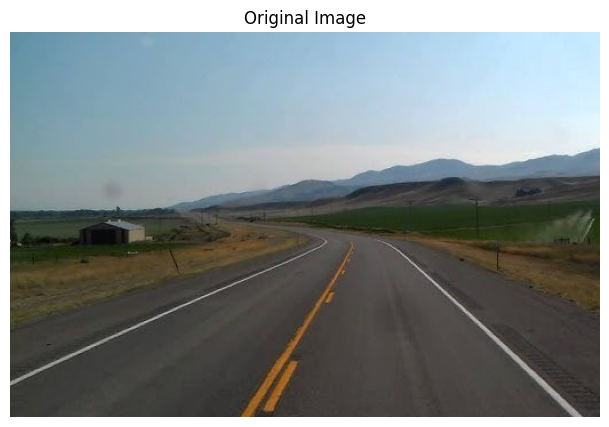

In [26]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

IMAGE_PATH = "sample3_cropped.jpg"

# Load image
img_bgr = cv2.imread(IMAGE_PATH)
if img_bgr is None:
    raise FileNotFoundError(f"Image not found at {IMAGE_PATH}")

# Convert to RGB for display
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

# Show original image
plt.figure(figsize=(10,5))
plt.imshow(img_rgb)
plt.title("Original Image")
plt.axis("off")
plt.show()


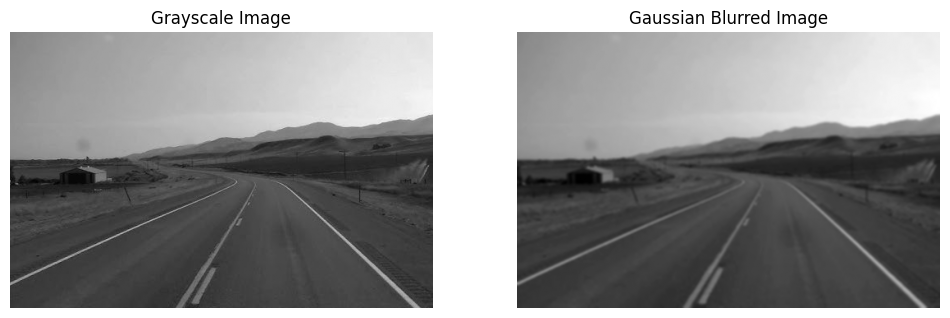

In [27]:
# Convert to grayscale and apply Gaussian smoothing
gray = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2GRAY)
kernel_size = 5
sigma = 1.5

blur = cv2.GaussianBlur(gray, (kernel_size, kernel_size), sigma)

# Show outputs
fig, axes = plt.subplots(1,2, figsize=(12,5))
axes[0].imshow(gray, cmap='gray')
axes[0].set_title("Grayscale Image")
axes[0].axis('off')

axes[1].imshow(blur, cmap='gray')
axes[1].set_title("Gaussian Blurred Image")
axes[1].axis('off')

plt.show()


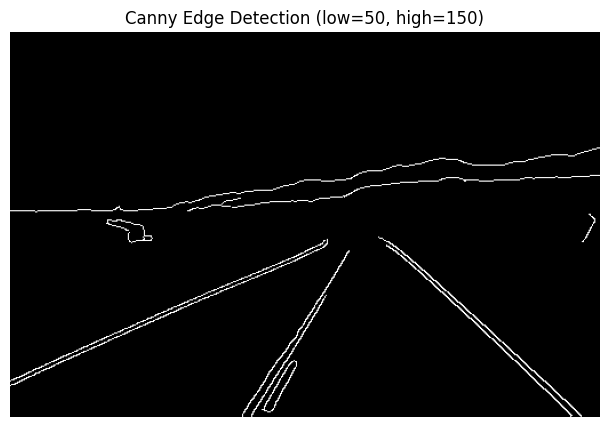

In [28]:
# Edge detection using Canny
canny_low = 50
canny_high = 150

edges = cv2.Canny(blur, canny_low, canny_high)

plt.figure(figsize=(10,5))
plt.imshow(edges, cmap='gray')
plt.title(f"Canny Edge Detection (low={canny_low}, high={canny_high})")
plt.axis("off")
plt.show()

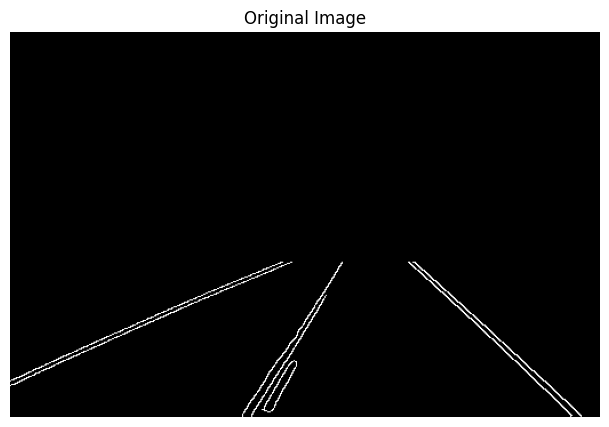

In [29]:
# ROI mask
h, w = edges.shape

roi_vertices = np.array([[
    (0, int((h-1)*0.6)), # top-left
    (w-1, int((h-1) * 0.6)), # top-right
    (w-1, h -1), # bottom-right
    (0, h -1)  # bottom-left
]], dtype=np.int32)

mask = np.zeros_like(edges)
cv2.fillPoly(mask, roi_vertices, 255)
edges_roi = cv2.bitwise_and(edges, mask)

# Show original image
plt.figure(figsize=(10,5))
plt.imshow(edges_roi, cmap='gray')
plt.title("Original Image")
plt.axis("off")
plt.show()


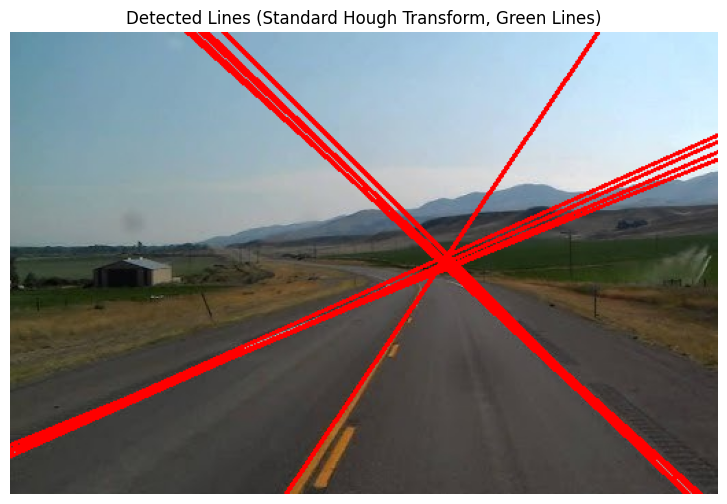

In [30]:
# Apply Standard Hough Transform (ρ–θ)
rho = 1
theta = np.pi / 180
threshold = 100

lines = cv2.HoughLines(edges_roi, rho, theta, threshold)

overlay_std = img_rgb.copy()

# Draw detected lines in green
if lines is not None:
    for rho, theta in lines[:,0]:
        a, b = np.cos(theta), np.sin(theta)
        x0, y0 = a * rho, b * rho
        x1, y1 = int(x0 + 800 * (-b)), int(y0 + 800 * (a))
        x2, y2 = int(x0 - 800 * (-b)), int(y0 - 800 * (a))
        cv2.line(overlay_std, (x1, y1), (x2, y2), (255, 0, 0), 2)

plt.figure(figsize=(10,6))
plt.imshow(overlay_std)
plt.title("Detected Lines (Standard Hough Transform, Green Lines)")
plt.axis("off")
plt.show()


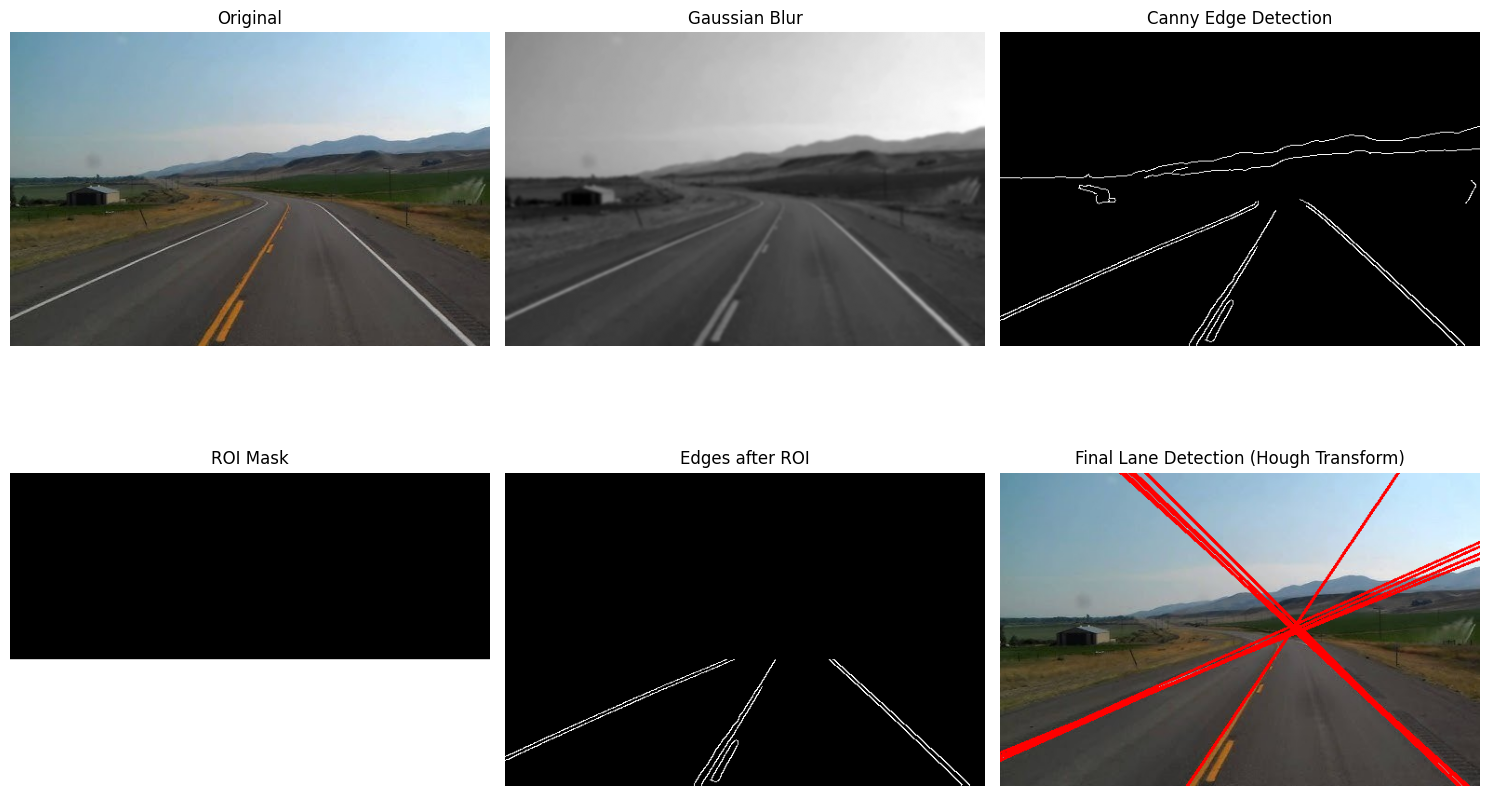

In [31]:
# Show all stages together for report clarity

fig, axes = plt.subplots(2,3, figsize=(15,10))

axes[0,0].imshow(img_rgb)
axes[0,0].set_title("Original")
axes[0,0].axis('off')

axes[0,1].imshow(blur, cmap='gray')
axes[0,1].set_title("Gaussian Blur")
axes[0,1].axis('off')

axes[0,2].imshow(edges, cmap='gray')
axes[0,2].set_title("Canny Edge Detection")
axes[0,2].axis('off')

axes[1,0].imshow(mask, cmap='gray')
axes[1,0].set_title("ROI Mask")
axes[1,0].axis('off')

axes[1,1].imshow(edges_roi, cmap='gray')
axes[1,1].set_title("Edges after ROI")
axes[1,1].axis('off')

axes[1,2].imshow(overlay_std)
axes[1,2].set_title("Final Lane Detection (Hough Transform)")
axes[1,2].axis('off')

plt.tight_layout()
plt.show()


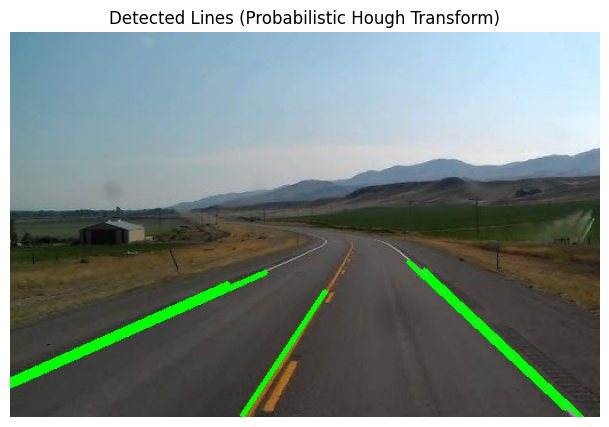

In [45]:
#Probabilistic Hough Transform
minLineLength = 40
maxLineGap = 20
houghP_thresh = 98

linesP = cv2.HoughLinesP(edges_roi, 1, np.pi/180, houghP_thresh, minLineLength=minLineLength, maxLineGap=maxLineGap)
overlay_p = img_rgb.copy()

if linesP is not None:
    for line in linesP:
        x1, y1, x2, y2 = line[0]
        cv2.line(overlay_p, (x1, y1), (x2, y2), (0, 255, 0), 4)

plt.figure(figsize=(10,5))
plt.imshow(overlay_p)
plt.title("Detected Lines (Probabilistic Hough Transform)")
plt.axis("off")
plt.show()


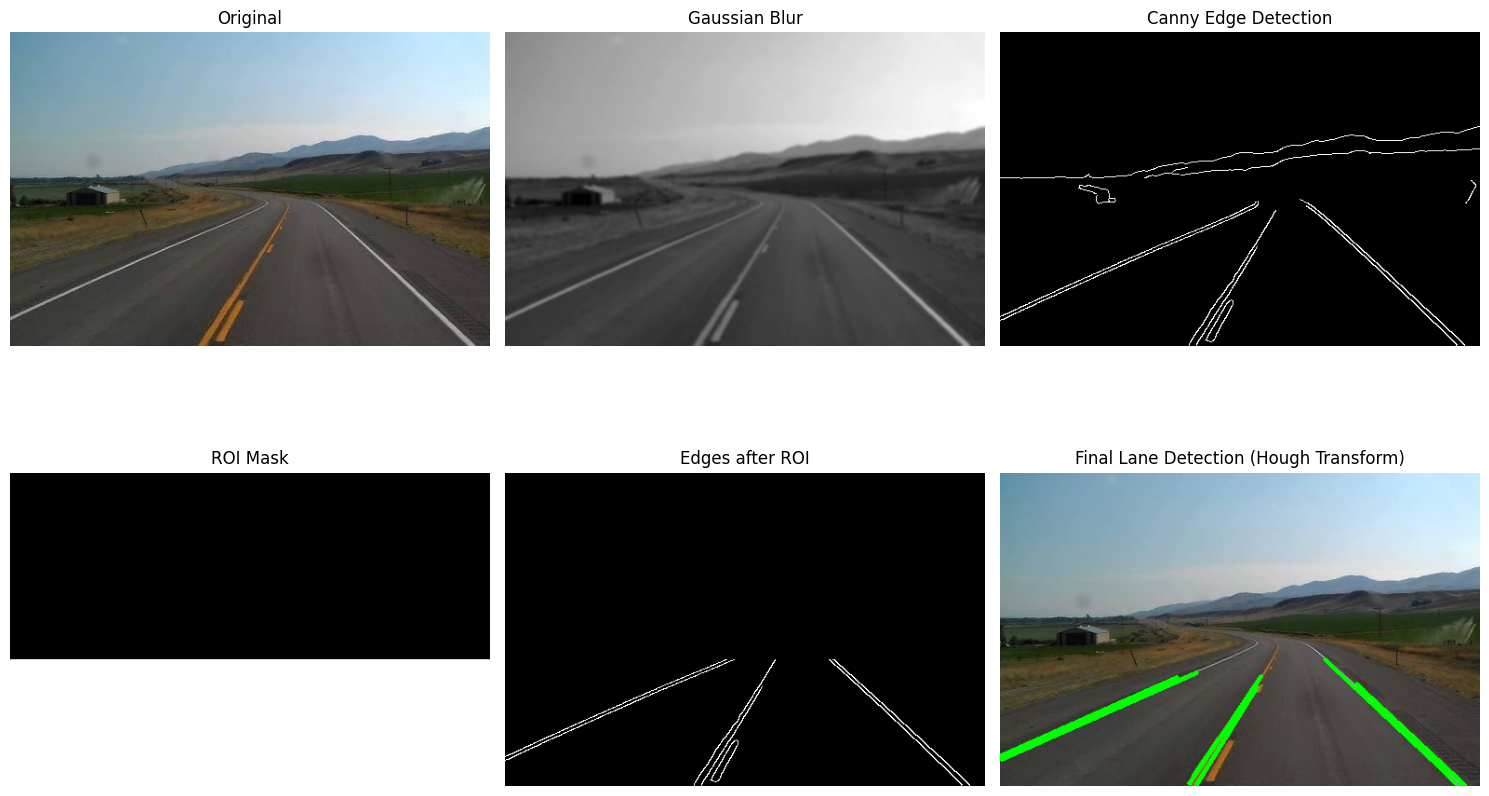

In [34]:
# Show all stages together for report clarity

fig, axes = plt.subplots(2,3, figsize=(15,10))

axes[0,0].imshow(img_rgb)
axes[0,0].set_title("Original")
axes[0,0].axis('off')

axes[0,1].imshow(blur, cmap='gray')
axes[0,1].set_title("Gaussian Blur")
axes[0,1].axis('off')

axes[0,2].imshow(edges, cmap='gray')
axes[0,2].set_title("Canny Edge Detection")
axes[0,2].axis('off')

axes[1,0].imshow(mask, cmap='gray')
axes[1,0].set_title("ROI Mask")
axes[1,0].axis('off')

axes[1,1].imshow(edges_roi, cmap='gray')
axes[1,1].set_title("Edges after ROI")
axes[1,1].axis('off')

axes[1,2].imshow(overlay_p)
axes[1,2].set_title("Final Lane Detection (Hough Transform)")
axes[1,2].axis('off')

plt.tight_layout()
plt.show()


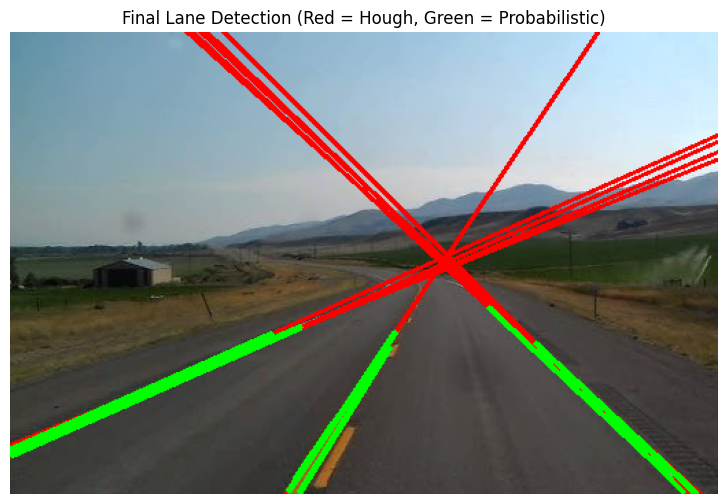

In [33]:
#Combine both detections (Standard + Probabilistic)
combined = overlay_std.copy()

if linesP is not None:
    for line in linesP:
        x1, y1, x2, y2 = line[0]
        cv2.line(combined, (x1, y1), (x2, y2), (0, 255, 0), 3)

plt.figure(figsize=(12,6))
plt.imshow(combined)
plt.title("Final Lane Detection (Red = Hough, Green = Probabilistic)")
plt.axis("off")
plt.show()
